In [1]:
import pandas as pd                                                  
import numpy as np                                                  
import os, sys, platform
import matplotlib.pyplot as plt                                      
import seaborn as sb                                                
from sklearn import preprocessing                                    
from sklearn.preprocessing import StandardScaler,MinMaxScaler       
from sklearn.model_selection import train_test_split, cross_val_score 
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
print(os.getcwd())
import os
data= pd.read_csv(r'winequality-red.csv' ,";")
data.head()

C:\Users\UW-User


C:\Users\UW-User\AppData\Local\Temp\ipykernel_11676\3867502952.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data= pd.read_csv(r'winequality-red.csv' ,";")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking for Missing Values

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Splitting Data

In [6]:
X = data.drop(columns='quality')
y = data['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train :',X_train.shape)
print('X_test  :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

X_train : (1279, 11)
X_test  : (320, 11)
y_train : (1279,)
y_test  : (320,)


# Data Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForestRegressor

In [8]:
#rf_model = RandomForestRegressor()

# hyperparameters for GridSearchCV
##param_grid = {
    #'n_estimators': [50, 100, 200],
    #'max_depth': [None, 10, 20],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}

# Perform grid search with RandomForestRegressor
#grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search_rf.fit(X_train_scaled, y_train)
#y_pred = grid_search_rf.predict(X_test_scaled)
#mse = mean_squared_error(y_test, y_pred)
#print(f'RandomForestRegressor MSE: {mse}')


In [9]:
RF= RandomForestRegressor(n_estimators=100, random_state=100)
RF.fit(X_train_scaled, y_train)
y_pred = RF.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f'RandomForestRegressor MSE: {mse}')
print("R^2 Score:", r2)

#from sklearn.metrics import r2_score
#r2_score(y_test, y_pred)

RandomForestRegressor MSE: 0.315293125
R^2 Score: 0.5175358866689581


# Cross-validation

In [10]:
cv_scores = cross_val_score(RF, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE:", -cv_scores.mean())

Cross-validation MSE: 0.42175916183385576


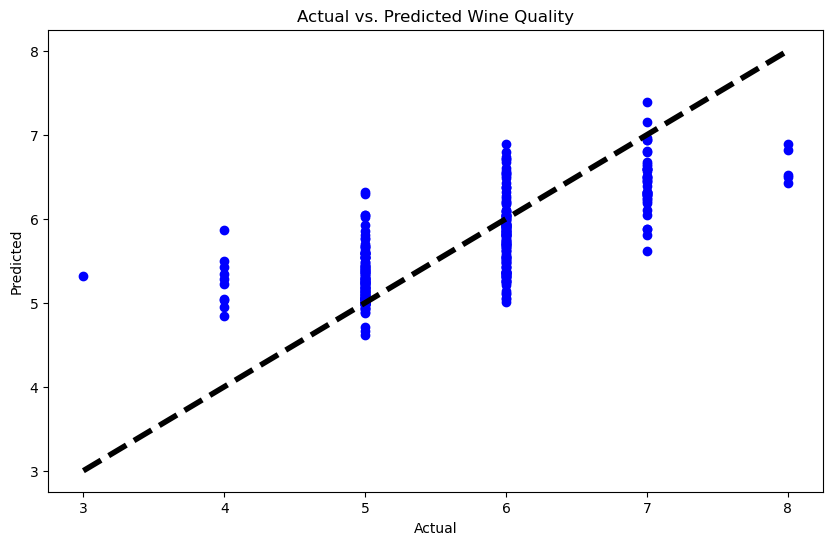

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Wine Quality')
plt.show()

In [12]:
#plt.plot(y_pred,y_test, '.')
#plt.plot(x_grid, regressor.predict(x_grid.reshape(-1,1)), color = 'blue')
#plt.title('Random Forest Regression')
#plt.xlabel('Actual Test value')
#plt.ylabel('Predicted Data')
#plt.show()
#RF_cm=confusion_matrix(y_test,y_pred)
#plot_confusion_matrix(RF_cm, 'Random Forest')

# Logistic Regression Model

In [13]:
LR= LogisticRegression(random_state=42, max_iter=10000)
LR.fit(X_train_scaled, y_train)
y_pred_LR = LR.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_LR)
r2= r2_score(y_test, y_pred_LR)
print(f'MSE for LR: {mse}')
print("R^2 Score:", r2)

MSE for LR: 0.490625
R^2 Score: 0.2492416204665342


# Cross-validation

In [14]:
cv_scores = cross_val_score(LR, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation Accuracy:", -cv_scores.mean())


Cross-validation Accuracy: 0.5377938871473354


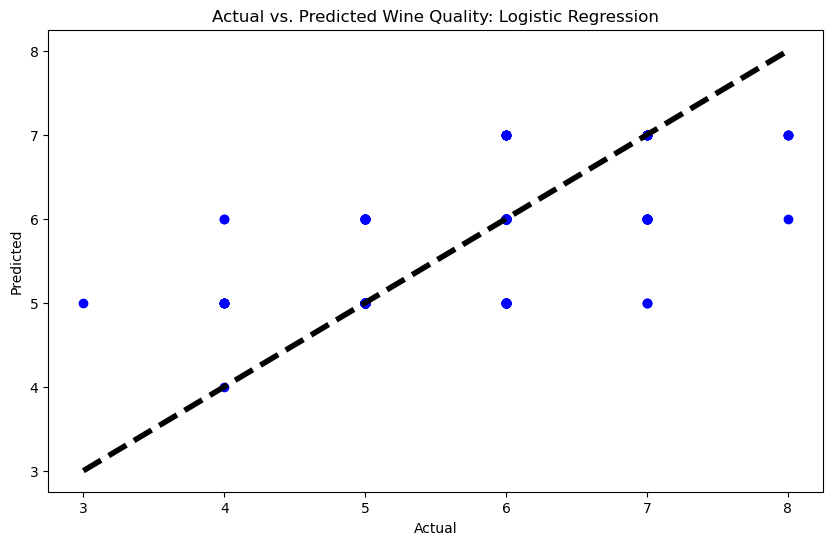

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_LR, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Wine Quality: Logistic Regression')
plt.show()

# Support Vector Machine Model

In [16]:
from sklearn.svm import SVC
svm= SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_svm)
r2= r2_score(y_test, y_pred_svm)
print(f'MSE for SVM model: {mse}')
print("R^2 Score for SVM model:", r2)

MSE for SVM model: 0.534375
R^2 Score for SVM model: 0.18229501337437803


In [17]:
cv_mse = cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE:", -cv_mse.mean())

Cross-validation MSE: 0.5331617647058824


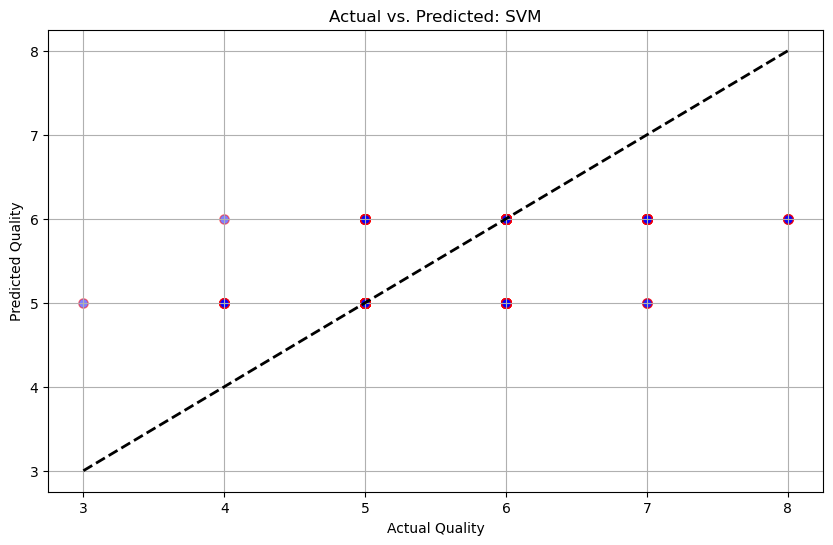

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, color='blue', marker='o', edgecolor='red', s=45, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted: SVM')
plt.grid(True)
plt.show()

# Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train_scaled, y_train)
y_pred_DT = DT.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_DT)
print("Mean Squared Error:", mse)
r2= r2_score(y_test, y_pred_DT)
print("R^2 Score for SVM model:", r2)

cv_mse = cross_val_score(DT, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validationfor MSE:", -cv_mse.mean())

Mean Squared Error: 0.6125
R^2 Score for SVM model: 0.06274750070981339
Cross-validationfor MSE: 0.6755055147058824


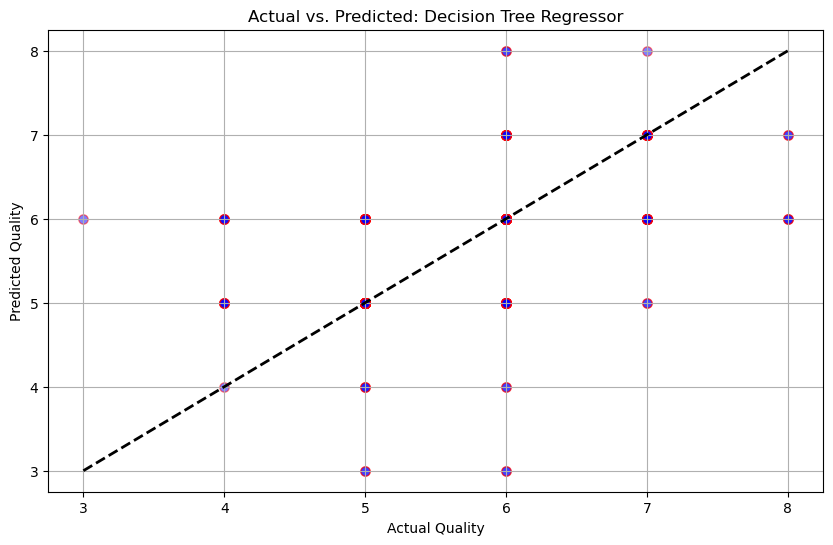

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_DT, color='blue', marker='o', edgecolor='red', s=45, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted: Decision Tree Regressor')
plt.grid(True)  # for grid lines
plt.show()

# Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
GD= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GD.fit(X_train_scaled, y_train)
y_pred_GD = GD.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_GD)
print("Mean Squared Error for gradient boosting:", mse)
r2= r2_score(y_test, y_pred_DT)
print("R^2 Score for Gradient Boosting:", r2)

cv_mse = cross_val_score(GD, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validationfor MSE:", -cv_mse.mean())



Mean Squared Error for gradient boosting: 0.3623352320145906
R^2 Score for Gradient Boosting: 0.06274750070981339
Cross-validationfor MSE: 0.4088353363053942


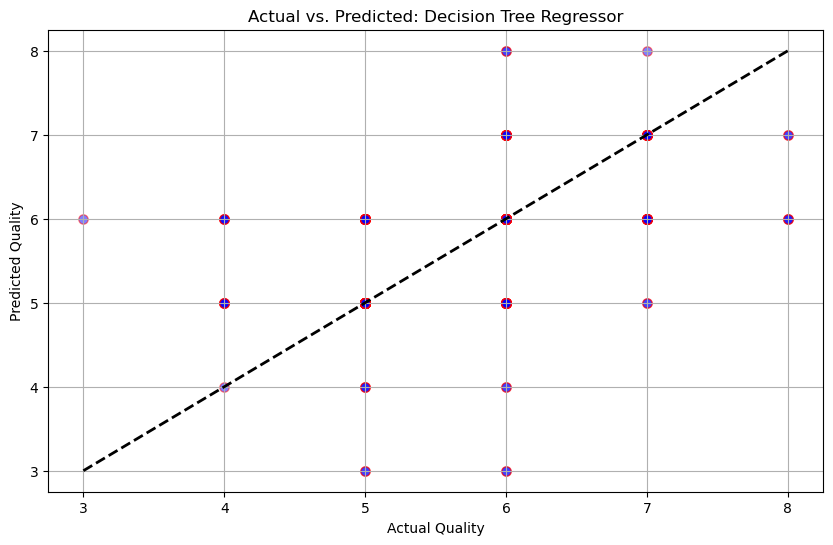

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_DT, color='blue', marker='o', edgecolor='red', s=45, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted: Decision Tree Regressor')
plt.grid(True)
plt.show()